# Respiratory Diseases Hazard
This notebook calculates the urban risk index for respiratory disease (RES)
hazard.  The URI calculation has three components: expected loss, social vulnerability, and resilience capacity.  

## 1. Expected Loss
The RES hazard expected loss (ESL) includes consequences for the following receptors and marginal losses.
 * Vulnerable People / Deaths
 * Vulnerable People / Injury
 * Vulnerable People / Lost Wages
 * People / Economic Loss

#### 1a. Vulnerable People / Deaths
Epidemiological estimates from the CDC and NYC DOHMH  were used to estimate the loss of life associated with a mild pandemic
(occuring 1 time per 20.4 years) and severe pandemic (occuring 1 time per 100 years).  The deaths were distributed
geographically based on estimates of the distribution of vulnerable population and the distribution of 
COVID-19 deaths in 2020.  FEMA values for the statistical value of life were used to valuate the loss of life.  

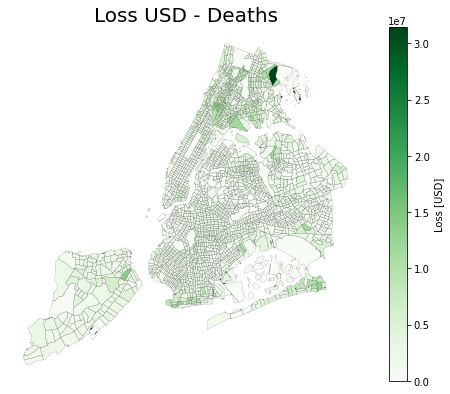

In [9]:
from MISC import params_1 as params
from MISC import utils_1 as utils
from MISC import plotting_1 as plotting
from CLASSES import class_EL_SV_CR_1 as URI
import matplotlib.pyplot as plt
import geopandas as gpd
import os
utils.set_home()
hazard_name = "RES"

#create ESL class and add loss
path_loss =   params.PATHNAMES.at['ESL_RES_death_loss', 'Value']
gdf_ESL_deaths = gpd.read_file(path_loss)
ESL = URI.ESL(hazard_name = hazard_name)
ESL.add_consequence("Death", "VulPop", gdf_ESL_deaths)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Death"]["map_tract"], 'Loss USD - Deaths')

#### 1b. Vulnerable People / Injury
The methods used to valuate deaths were applied to valuate losses due to suffering from injuries.  Each hospitalization case 
was counted as
an injury and valuated as "Moderate" on the Abbreviated Injury Scale (version 2). 

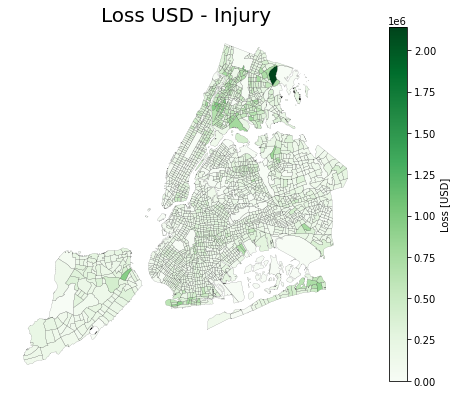

In [10]:
#all loss to ESL class
path_loss =   params.PATHNAMES.at['ESL_RES_injury_loss', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL.add_consequence("Injury", "VulPop", gdf_loss)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Injury"]["map_tract"], 'Loss USD - Injury')

#### 1c. Vulnerable People / Lost Wages
The methods used to valuate deaths and injuries were applied to assess lost wages due to injuries.  Each hospitalization case and 
recovery was assumed to lose 5 working days.  The lost wages were valuated using an average estimate from various sources.  

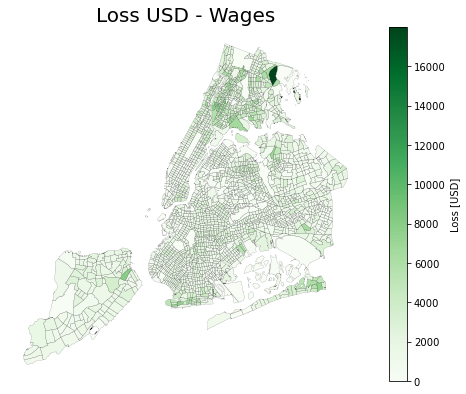

In [11]:
#all loss to ESL class
path_loss =   params.PATHNAMES.at['ESL_RES_wages_loss', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL.add_consequence("Wages", "VulPop", gdf_loss)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Wages"]["map_tract"], 'Loss USD - Wages')

#### 1d. People / Economic Loss
Economic studies were used to determine the annualized cost of respiratory pandemics to the economy at large.
For example, for the severe scenario, Cutter and Summers (2020) estimate that the cost to the US GDP of the COVID-19 pandemic 
is 7.6 trillion USD, 
as of mid-October. Scaling from the 7 months between mid-March and the publication of their estimate down to the 10 weeks 
assumed by the scenario, and scaling from the US GDP to NYC using the ratio of the city’s to the nation’s population,
 gives a rough estimate of 68 billion USD.

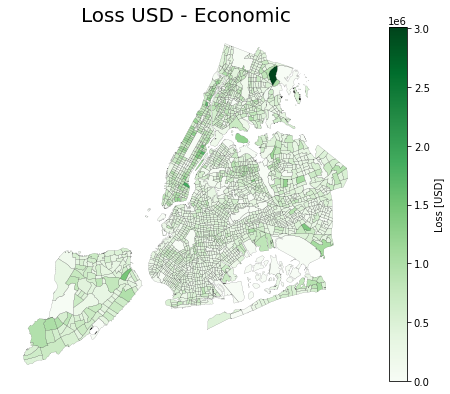

In [12]:
#all loss to ESL class
path_loss =   params.PATHNAMES.at['ESL_RES_economy_loss', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL.add_consequence("Economic", "People", gdf_loss)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Economic"]["map_tract"], 'Loss USD - Economic')

#### 1e. Expected Loss Total
The total expected losses are the sum of losses from each individual consequence.  

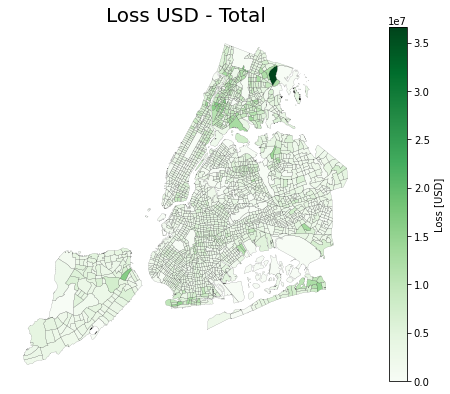

In [13]:
#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\ESL\ESL_{}_tract.shp'.format(hazard_name, hazard_name)
ESL.ESL_map.to_file(path_save)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.ESL_map, 'Loss USD - Total')

## 2. Social Vulnerability Score
The Social Vulnerability is based on the CDC social vulnerability index.  

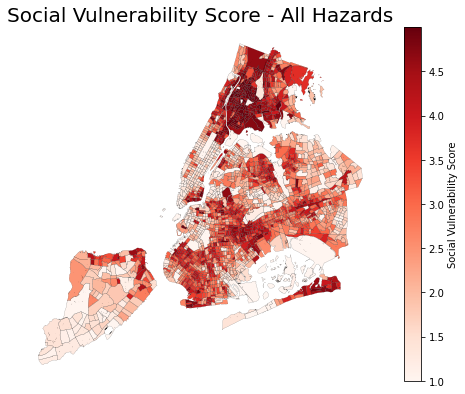

In [14]:
path_SOV = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\SOV\SOV_tract.shp'
gdf_SOV = gpd.read_file(path_SOV)
SOV = URI.SOV(hazard_name = hazard_name, map_tract = gdf_SOV)


#plot
plotting.plot_SOV_nb(SOV.SOV_map)

## 3. Resilience Capacity Score
The Resilience Capacity is the sum of four scores:
- Community Capital
- Mitigation Landscape
- Response Capacity
- Recovery Resources


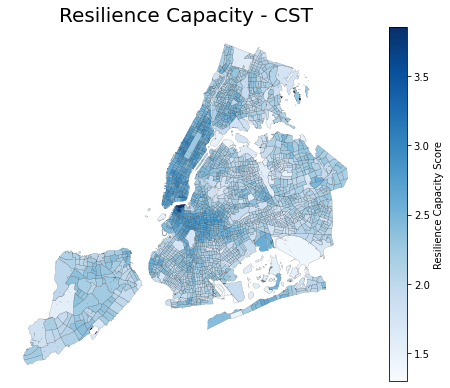

In [15]:
path_RCA = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\RCA\RCA_{}_tract.shp'.format(hazard_name)
gdf_RCA = gpd.read_file(path_RCA)
RCA = URI.RCA(hazard_name=hazard_name, map_tract=gdf_RCA)
#
plotting.plot_RCA_nb('CST', RCA.RCA_map)

## 4. Calculate URI Score
The URI equation is URI = ESL * SOV / RCA.  The result is clustered into a score of 1 (low) to 5 (high).

In [16]:
URI_HAZ = URI.URI(hazard_name=hazard_name, ESL=ESL, SOV=SOV, RCA=RCA)
URI_HAZ.calc_URI()

#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\URI\URI_{}_tract.shp'.format(hazard_name, hazard_name)
URI_HAZ.URI_map.to_file(path_save)
URI_HAZ.save_URI_FULL()
plotting.plot_URI_nb(hazard_name, URI_HAZ.URI_map)





